In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axisartist import Subplot
from matplotlib.ticker import FuncFormatter, Formatter
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
C_to_K = 273.15
skew_slope = 40

In [2]:
def x_from_Tp(T,p):
    """finding x coordinates from Tp. temp in celcius, p in mb"""
    x_from_Tp = T - (skew_slope*np.log(p))
    return(x_from_Tp)

In [3]:
def y_from_p(p):
    """finding y coordinates from pressure. p in mb"""
    y_from_p = - np.log(p)
    return(y_from_p)

In [4]:
def T_from_xp(x,p):
    """finding temp from the x coordinates. p in mb"""
    T_from_xp = x+(skew_slope*np.log(p))
    return(T_from_xp)

In [5]:
def p_from_y(y):
    """finding pressure from the y coordinates. p in mb"""
    p_from_y = np.exp(-y)
    return(p_from_y)

In [6]:
def to_thermo(x,y):
    """Transform (x,y) coordinates to T in degrees celsius and p in mb."""
    p = p_from_y(y)
    T_C = T_from_xp(x,p) - C_to_K
    return T_C , p

In [7]:
def from_thermo(T_C, p):
    """Transform T_C (in degress celsius) and p (in mb) to (x,y)."""
    y= y_from_p(p)
    x= x_from_Tp(T_C + C_to_K, p)
    return x, y

In [8]:
#values along the bottom and left edges
p_bottom = 1050.0
p_top =150
T_min = -40 + C_to_K
T_max = 50 + C_to_K

In [9]:
x_min=x_from_Tp(T_min,p_bottom)
print(x_min)
    

-45.11181772606278


In [10]:
x_max=x_from_Tp(T_max,p_top)
print(x_max)

122.72458823614977


In [11]:
y_min=y_from_p(p_bottom)
print(y_min)

-6.956545443151569


In [12]:
y_max=y_from_p(p_top)
print(y_max)

-5.0106352940962555


In [13]:
p_levels= np.arange(1000, 100, -50)
T_C_levels= np.arange(-80, 40+10, 10)
print (p_levels)
print(T_C_levels)

[1000  950  900  850  800  750  700  650  600  550  500  450  400  350
  300  250  200  150]
[-80 -70 -60 -50 -40 -30 -20 -10   0  10  20  30  40]


In [14]:
T_levels= T_C_levels + C_to_K
print(T_levels)

[193.15 203.15 213.15 223.15 233.15 243.15 253.15 263.15 273.15 283.15
 293.15 303.15 313.15]


In [15]:
theta_levels= np.arange(-40, 100+10, 10)+ C_to_K
print(theta_levels)

[233.15 243.15 253.15 263.15 273.15 283.15 293.15 303.15 313.15 323.15
 333.15 343.15 353.15 363.15 373.15]


In [16]:
theta_ep_levels = theta_levels.copy()

In [17]:
mixing_ratios= np.asarray([0.0004, 0.001, 0.002, 0.003, 0.005, 0.008, 0.012, 0.016, 0.02])

In [18]:
import Bolton

In [19]:
p_all= np.arange(p_bottom, p_top-1, -1)
#print(p_all)

In [20]:
y_p_levels= y_from_p(p_levels)
print (y_p_levels)

[-6.90775528 -6.85646198 -6.80239476 -6.74523635 -6.68461173 -6.62007321
 -6.55108034 -6.47697236 -6.39692966 -6.30991828 -6.2146081  -6.10924758
 -5.99146455 -5.85793315 -5.70378247 -5.52146092 -5.29831737 -5.01063529]


In [21]:
y_all_p= y_from_p(p_all)
#print(y_all_p)

In [22]:
x_T_levels= [x_from_Tp(Ti, p_all) for Ti in T_levels]

In [23]:
x_thetas = [x_from_Tp(Bolton.theta_dry(theta_i, p_all), p_all) for theta_i in theta_levels]

In [24]:
x_mixing_ratios= [x_from_Tp(Bolton.mixing_ratio_line(p_all, mixing_ratio_i)+C_to_K, p_all) for mixing_ratio_i in mixing_ratios]

In [25]:
mesh_T, mesh_p = np.meshgrid( np.arange(-60.0, T_levels.max()-C_to_K+0.1, 0.1), p_all)
theta_ep_mesh = Bolton.theta_ep_field(mesh_T, mesh_p)

SVP_T= [[-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 ...
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]]
SVP_T= [[-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 ...
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]]


In [66]:
def theta_e(T, p, p_0=1000):
    R_d=287.1
    alpha=3.139*10**6
    cp=1005
    cl=4218
    w_s=Bolton.sat_mixing_ratio(p, T)
    L_v= alpha-((T+273.15)*(cp-cl))
    cwd=cp+(w_s*cl)
    term_1= (273.15+T)* (p_0/p)**(R_d/cwd)
    term_2= np.exp((L_v*w_s)/(cwd*(T+273.15)))
    theta_e= term_1*term_2
    return (theta_e)

In [67]:
def theta_e_line(T, p, p_0=1000):
    w_s=Bolton.sat_mixing_ratio(p,T)
    t_e=theta_e(T, p, p_0=1000)
    theta_e_line=t_e
    return (theta_e_line)

In [68]:
theta_e_levels=theta_levels.copy()
theta_mesh = theta_e_line(mesh_T, mesh_p)

SVP_T= [[-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 ...
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]]
SVP_T= [[-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 ...
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]
 [-60.  -59.9 -59.8 ...  39.8  39.9  40. ]]


In [28]:
skew_grid_helper = GridHelperCurveLinear((from_thermo, to_thermo))


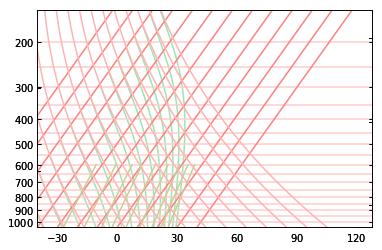

In [29]:
fig= plt.figure()
ax= Subplot(fig, 1, 1, 1, grid_helper=skew_grid_helper)
fig.add_subplot(ax)

for yi in y_p_levels:
    ax.plot((x_min, x_max), (yi, yi), color=(1.0, 0.8, 0.8))
    
for x_T in x_T_levels:
    ax.plot(x_T, y_all_p, color=(1.0,0.5, 0.5))
    
for x_theta in x_thetas:
    ax.plot(x_theta, y_all_p, color=(1.0, 0.7, 0.7))
    
for x_mixing_ratio in x_mixing_ratios:
    good = p_all >= 600 #restrict mixng ration lines to below 600 mb
    ax.plot(x_mixing_ratio[good], y_all_p[good], color=(0.8, 0.8, 0.6))
    
def format_coord(x, y):
    T, p= to_thermo(x, y)
    return "{0:5.1f} C, {1:5.1f} mb".format(float(T), float(p))

ax.format_coord = format_coord
    
n_moist = len(theta_ep_levels)
moist_colors= ((0.6,0.9,0.7),)*n_moist
ax.contour(x_from_Tp(mesh_T+C_to_K, mesh_p), y_from_p(mesh_p), theta_ep_mesh, theta_ep_levels, colors=moist_colors)

#your code for plotting theta_e (reversible)

ax.axis((x_min, x_max, y_min, y_max))

plt.show()

In [30]:
print("sat_mix=", Bolton.sat_mixing_ratio(800, 10))

SVP_T= 10
sat_mix= 0.009689882754480676


In [31]:
import readsoundings

In [32]:
sounding = "/Users/cecekelley/Desktop/Sounding_for_CP_Project.txt"
sounding_data= readsoundings.parse_SPC(sounding)

In [33]:
snd_T= sounding_data['T']
#all temperature values, deg C, should be in this range.
good_T = (snd_T > -100.0) & (snd_T < 60.0)

In [34]:
snd_p= sounding_data['p']
#all pressure calues, mb, should be in this range
good_p= (snd_p < 918) & (snd_p > 0)

In [35]:
snd_Td= sounding_data['Td']
#all dewpoint values, deg C, should be in this range
good_Td= (snd_Td > -100.0) & (snd_Td < 60.0)

In [36]:
x_snd_T, y_snd_p=from_thermo(snd_T[good_T], snd_p[good_p])
x_snd_Td, y_snd_p= from_thermo(snd_Td[good_Td], snd_p[good_p])

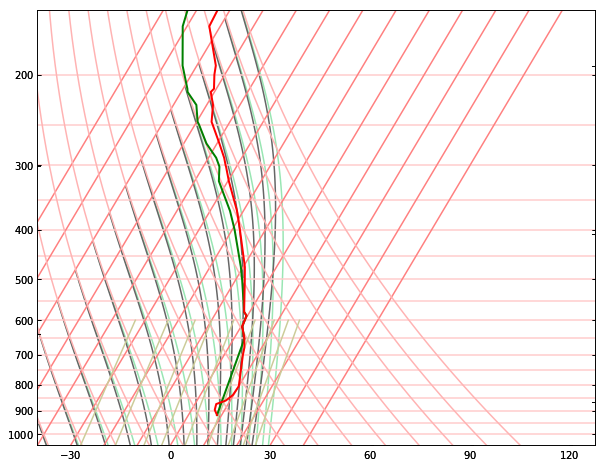

In [72]:
fig= plt.figure(figsize=(10,8))
ax= Subplot(fig, 1, 1, 1, grid_helper=skew_grid_helper)
fig.add_subplot(ax)

for yi in y_p_levels:
    ax.plot((x_min, x_max), (yi, yi), color=(1.0, 0.8, 0.8))
    
for x_T in x_T_levels:
    ax.plot(x_T, y_all_p, color=(1.0,0.5, 0.5))
    
for x_theta in x_thetas:
    ax.plot(x_theta, y_all_p, color=(1.0, 0.7, 0.7))
    
for x_mixing_ratio in x_mixing_ratios:
    good = p_all >= 600 #restrict mixng ration lines to below 600 mb
    ax.plot(x_mixing_ratio[good], y_all_p[good], color=(0.8, 0.8, 0.6))
    
def format_coord(x, y):
    T, p= to_thermo(x, y)
    return "{0:5.1f} C, {1:5.1f} mb".format(float(T), float(p))

ax.format_coord = format_coord

ax.plot(x_snd_Td, y_snd_p, linewidth=2, color='g')
ax.plot(x_snd_T, y_snd_p, linewidth=2, color='r')
    
n_moist = len(theta_ep_levels)
moist_colors= ((0.6,0.9,0.7),)*n_moist
ax.contour(x_from_Tp(mesh_T+C_to_K, mesh_p), y_from_p(mesh_p), theta_ep_mesh, theta_ep_levels, colors=moist_colors)

E_lines = len(theta_e_levels)
theta_e_colors = ((0.4, 0.4, 0.4),)*E_lines
ax.contour(x_from_Tp(mesh_T+C_to_K, mesh_p), y_from_p(mesh_p), theta_mesh, theta_e_levels, colors=theta_e_colors)

ax.axis((x_min, x_max, y_min, y_max))

plt.show()


# ax.plot(x_snd_Td, y_snd_p, linewidth=2, color='g')
# ax.plot(x_snd_T, y_snd_p, linewidth=2, color='r')
# plt.show()